# Numpy Primer 

NumPy offers various numerical algorithms such as methods from linear algebra. Most importantly, we can efficiently work with vectors or matrices (NumPy arrays). In contrast to normal Python lists, NumPy arrays have to have the same type. Numpy organizes its arrays using a contingent block of memory and meta data to access its elements:

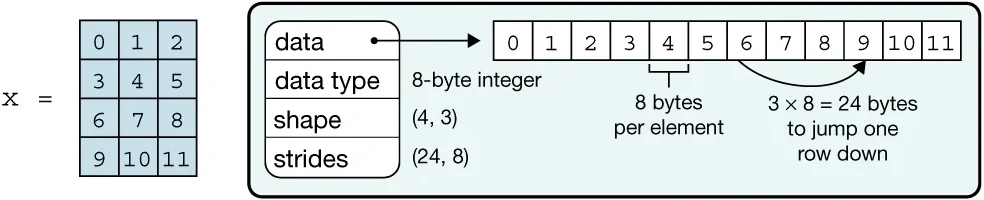

* The **shape** keeps track of the number of axes (array dimensions) there are. It is a Python tuple.
* The **data type** correponds to the one type all elements have (accessed by `.dtype`)
* **data** refers to an allocated binary memory block containing the actual values.

Numpy is designed for vectorized (pre-compiled) operations that run faster than the interpreted native CPython code. However, its primary design goal is to work on a single processor -- in contrast to distributed systems such as GPU clusters. 

NumPy is also really clean to read: 

```
b = np.dot(A, x) # gives the matrix vector multiplication Ax
```

Deep learning libraries such as *TensorFlow* or *PyTorch* take this one step farther and offer GPU access via CUDA and distribution over a cluster of computers. 
**However**, their syntax strikingly resembles NumPy which is why it still pays off to learn about it.

## NumPy arrays

In [1]:
# fine in python
l = [2, "abc", 3.0]

import numpy as np
# not acceptable in NumPy
nl = np.array(l) # converts everything to String
print(nl)
print(type(nl))
print(nl.dtype) # U11 is a string type

['2' 'abc' '3.0']
<class 'numpy.ndarray'>
<U32


In [2]:
# a simple vector 
x = np.array([1, 7.5, 3.14])
print(x)

[1.   7.5  3.14]


`x`is a single three-dimensional vector but it is a one-dimensional array! It has exactly one entry in its dimension and strides

In [3]:
print(x.shape)
print(x.strides) # jumping from one element to the next in this axis correponds to a shift by 8 bytes (one number)
print(x.data)

(3,)
(8,)


A two-dimensional array corresponds to a matrix with the first entry denoting how many rows, the second how many columns there are. We can pass nested lists for initialization and access elements using square brackets:

In [3]:
A = np.array([[3., 1., 4.], [2., 0., 1.]])
print(A)
print(A.shape)
print("---") 
print(A[0,2]) # first row, last column

[[3. 1. 4.]
 [2. 0. 1.]]
(2, 3)
---
4.0


Reshaping a matrix/tensor is sometimes part of the less glamorous part of an ML engineer's job. Essentially, you just tell NumPy to interpret the memory block differently, based on a new shape:

In [8]:
# let's see how I would view A if it were not 2 x 3 but 3 x 2
A_ = A.reshape(3,2, order='F')
print(A_)
print(A_.shape)

[[3. 0.]
 [2. 4.]
 [1. 1.]]
(3, 2)


Of course, you can go further and add more array dimensions to obtain what's called a *tensor* in TensorFlow or PyTorch. They're not used as commonly in pure numpy. But it's basically just more indices ... 

In [6]:
T = np.array([ [ [3., 1.] , [4., 2.]] , [[2., 0.], [1., 3.]], [[4., 7.], [-1., 0.]]])
print(T)
print(T.shape)

[[[ 3.  1.]
  [ 4.  2.]]

 [[ 2.  0.]
  [ 1.  3.]]

 [[ 4.  7.]
  [-1.  0.]]]
(3, 2, 2)


A useful application for tensors would be an image which is indexed by three numbers 
* width `w`
* height `h`
* channel `c` - the color channel red, green, and blue

You can always get a fresh NumPy array using `np.zeros()` or `np.ones()` and passing the appropriate shape tuple. For instance, a $28 \times 28$ RGB image would have the same dimensions as:

In [7]:
zero_image = np.zeros((28, 28, 3))

Every pixel location will give us a 3-dimensional vector for the color channels:

In [8]:
print(zero_image[10, 10])

[0. 0. 0.]


And a single line will consist of 28 pixels (again with 3 channels)

In [9]:
print(zero_image[10])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [10]:
# The following command will set up matplotlib for plotting 
# such that we can actually see the image we just created
%pylab inline

Populating the interactive namespace from numpy and matplotlib


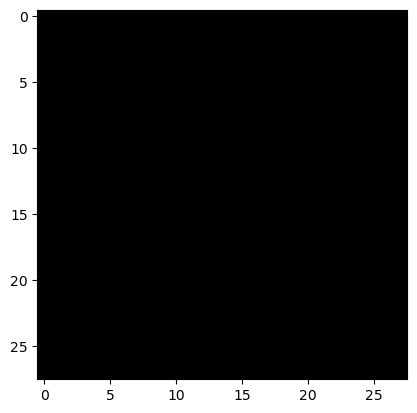

In [11]:
imshow(zero_image) # not too exciting

Now let's make the 14th row and 14th column all white

In [12]:
zero_image[14] = 1.0 # this operation broadcasts the assignment to all elements in the 14th row

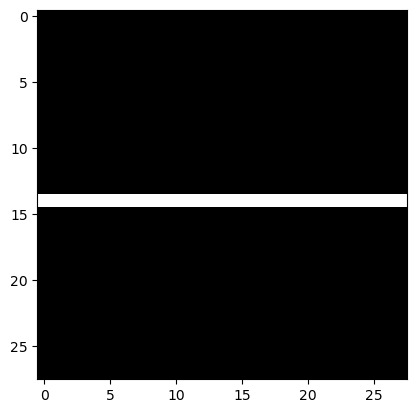

In [13]:
imshow(zero_image)

For the 14th column, we need a little more exact slicing. We want to tell NumPy. Starting with `zero_image`, give me (whatever row index) at the 14th column and (whatever col index). We use the colon `:` to achieve this.

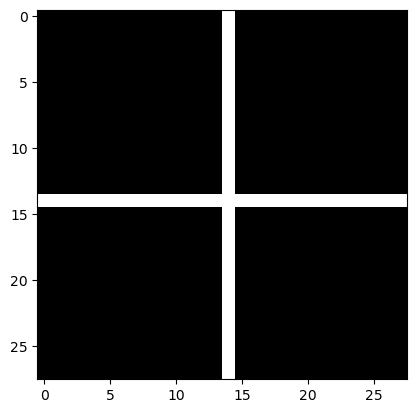

In [14]:
zero_image[:,14,:] = 1.0
imshow(zero_image)

Finally, we want to make use of the channels. Currently, all channels in the 14th row and col are set to 1 - we're not using the color capabilities at all.

Let's set the green and blue channels of the 14th row back to zero:

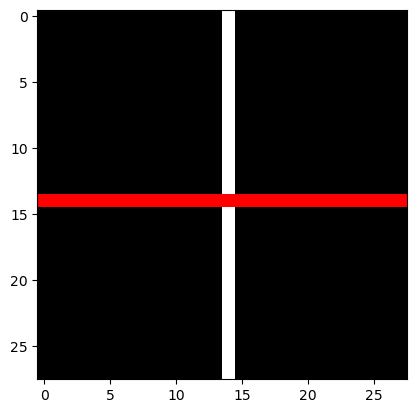

In [15]:
zero_image[14,:, 1:3] = 0.0 
# we have to start at index 1 (green) and go up to index 2 (blue) which means we need to write 3 (slicing excludes upper)
imshow(zero_image)

And let's do the same for the red and green values of the 14th column.

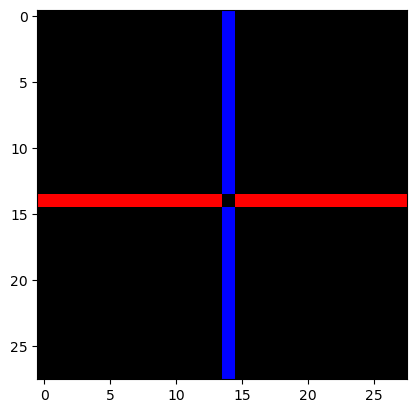

In [16]:
zero_image[:,14,0:2] = 0
imshow(zero_image)

**Write a function that takes as arguments width and height $\leq$ 28 and returns a fresh image with a centered, green rectangle**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


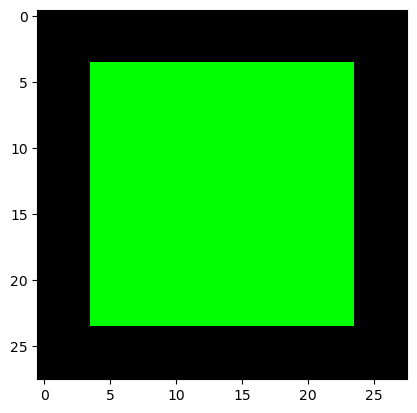

In [12]:
def centered_green_rect(img_width, img_height, rect_width, rect_height):
    if img_height > 28 or img_width > 28:
        print("Error: Height and width must be <= 28!")
        return None 
    
    rect_width = min(rect_width, img_width)
    rect_height = min(rect_height, img_height)
    # example_ img_width = 28, rect_width = 20 
    # we have 8 black parts in each row & column (28-20) --> we want to start at row/column 4
    rect_x = (img_width - rect_width) // 2    
    rect_y = (img_height - rect_height) // 2
    img = np.zeros((img_width, img_height, 3))
    # rows (y), columns (x), color 
    img[rect_y:rect_y+rect_height, rect_x:rect_x+rect_width, :] = [0, 255, 0] # RGB
    return img

img_with_green_rect = centered_green_rect(28, 28, 20, 20)
imshow(img_with_green_rect)

# NumPy Linear Algebra operations

### Matrix multiplication

Arguably, the most important operation we'll use is simply matrix multiplication. If you haven't already, now is the time to watch https://www.youtube.com/watch?v=kYB8IZa5AuE to refresh your memory. Let's start with a simple $2 \times 2$ example:

$ A = \begin{bmatrix}
    2 & 1  \\
    0 & 4 
  \end{bmatrix}, x = \begin{bmatrix} 1  \\ 2  \end{bmatrix} $
  
$$
Ax = 1 \cdot \begin{bmatrix} 2 \\ 0 \end{bmatrix} + 2 \cdot \begin{bmatrix} 1 \\ 4 \end{bmatrix} = \begin{bmatrix} 4 \\ 8 \end{bmatrix}
$$

We'll confirm this using NumPy:

In [65]:
A = np.array([[2., 1.], [0., 4.]])
x = np.array([1.,2.])

b = np.dot(A,x) # this is not simply A*x which would be component-wise multiplication if shapes align!
print(b)

[4. 8.]


### Vector space operations

More generally, you can treat vectors, matrices, and tensors represented by NumPy arrays as elements of a vector space. That means you can add them and multiply them by a scalar. That also means you get those element-wise operations for free - no need for list comprehensions or something like that (beware of for-loops!).


In [66]:
x = np.array([1.,2.])
y = np.array([3.,-5.])

z = x + y      # gives the component-wise addition
v = 2*x        # scalar multiplication

print(z)
print(v)

[ 4. -3.]
[2. 4.]


### Identity 
If you want an arbitrary $n \times n$ identity matrix, `np.eye()` is your friend:

In [68]:
two_id = np.eye(2)
print(two_id)

three_id = np.eye(3)
print(three_id)

[[1. 0.]
 [0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Inverting matrices

To get the inverse of a matrix $A$, that is $A^{-1}$ such that $AA^{-1} = A^{-1}A = I$, you can call `np.linalg.inv`

In [77]:
A = np.array([[2., 1.], [0., 4.]])
A_inv = np.linalg.inv(A)

print(A_inv)
res = np.dot(A, A_inv)
print(res)

[[ 0.5   -0.125]
 [ 0.     0.25 ]]
[[1. 0.]
 [0. 1.]]


### Solving systems of linear equations
The first task in linear algebra, solving for $x$ in equations $Ax = b$ can, in principle, be solved by inverting $A$ and multiplying with $A^{-1}$ from left to get $x = A^{1}b$. We will revisit this first in our lecture on linear models (linear regression that fits a line with minimal squared error):

In [81]:
A = np.array([[2., 1.], [0., 4.]])
A_inv = np.linalg.inv(A)
b = np.array([1., 3.])
x = np.dot(A_inv, b)

print(x)
print(np.dot(A, x)) # should be b

[0.125 0.75 ]
[1. 3.]


A much more numerically stable (and computationally beneficial) variant is to directly call `np.linalg.solve`

In [82]:
x = np.linalg.solve(A,b)
print(x)

print(np.dot(A,x))

[0.125 0.75 ]
[1. 3.]


### Eigenvalues 

To find the eigenvectors and eigenvalues of a matrix (if you need a phenomenal explanation/brush-up -> https://www.youtube.com/watch?v=PFDu9oVAE-g), use `np.linalg.eig()`. Briefly, for a matrix $A$, an eigenvector $v$ is a vector that still points in the same direction -- it might get stretched or compressed. For some scalar $\lambda$, we have

$$
Av = \lambda v
$$

We will revisit eigenvalues when we analyze why training a recurrent neural network (say, on an English sentence consisting of 100 words) can become very difficult.

In [87]:
eig_vals, eig_vecs = np.linalg.eig(A)
print(eig_vals)
print(eig_vecs)

[2. 4.]
[[1.         0.4472136 ]
 [0.         0.89442719]]


We can quickly check if multiplying the obtained eigenvectors with $A$ is the same as simply multiplying them with their corresponding eigenvalues.

In [90]:
# let's test this: For the first eigenvector
print(np.dot(A, eig_vecs[:,0]))
print(eig_vals[0] * eig_vecs[:,0])

# for the second eigenvector
print(np.dot(A, eig_vecs[:,1]))
print(eig_vals[1] * eig_vecs[:,1])

[2. 0.]
[2. 0.]
[1.78885438 3.57770876]
[1.78885438 3.57770876]


Sometimes you need to represent a simple n-dimensional vector as an explicit column vector ($n \times 1$) or row vector ($1 \times n$). Either because your algorithm needs some proper alignments to make matrix multiplications work out - or an API forces you to do so. 

A one-dimensional NumPy array will have shape `(n, )` -- just one axis with $n$ numbers to fill. There are a couple of ways to achieve this:

1. You can call `.reshape(n,1)` or `.reshape(1, n)` manually

In [73]:
a = np.array([1,2,5])
print(a.shape)
a_col = a.reshape(3,1)
print(a_col)

a_row = a.reshape(1,3)
print(a_row)

(3,)
[[1]
 [2]
 [5]]
[[1 2 5]]


2. You can call `.reshape(-1, 1)` or `.reshape(1, -1)` where `-1` indicates that NumPy should figure out the missing value for that dimension itself (you see this quite frequently used in code).

In [83]:
a_col = a.reshape(-1,1)
print(a_col)

a_row = a.reshape(1,-1)
print(a_row)

[[1]
 [2]
 [5]]
[[1 2 5]]


3. You can use `np.atleast_2d(a)` to get a row vector with dimensions `(len(a), 1)`.

In [91]:
print(np.atleast_2d(a))

[[1 2 5]]


This notebook should get you comfortable with the basics of NumPy and be a good start for our lectures.  To get a more in-depth tutorial on NumPy, consider using this browser-based walkthrough: https://www.datacamp.com/community/tutorials/python-numpy-tutorial